# Practice notebook for regression analysis with NHANES

This notebook will give you the opportunity to perform some
regression analyses with the NHANES data that are similar to
the analyses done in the week 2 case study notebook.

You can enter your code into the cells that say "enter your code here",
and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar
to code that appears in the case study notebook.  You will need
to edit code from that notebook in small ways to adapt it to the
prompts below.

To get started, we will use the same module imports and
read the data in the same way as we did in the case study:

In [6]:
# Import modules
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Read the data
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Drop unused columns
vars = ["RIDAGEYR", "RIAGENDR", "RIDRETH1", "BMXBMI"]

# Drop rows with any missing values
df = da[vars].dropna()

df

,RIDAGEYR,RIAGENDR,RIDRETH1,BMXBMI
0,62,1,3,27.8
1,53,1,3,30.8
2,78,1,3,28.8
3,56,2,3,42.4
4,42,2,4,20.3
...,...,...,...,...
5730,76,2,3,21.5
5731,26,1,3,33.8
5732,80,2,3,31.0
5733,35,1,3,26.0


## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [11]:
# Construct linear regression model to relate the expected body mass index (BMI) to a person's age
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     20.17
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           7.21e-06
Time:                        11:07:18   Log-Likelihood:                -19118.
No. Observations:                5662   AIC:                         3.824e+04
Df Residuals:                    5660   BIC:                         3.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.2788      0.263    107.496      0.000      27.763      28.795
RIDAGEYR       0.0230      0.005      4.492      0.000       0.013       0.033
==============================================================================
Omnibus:                     1083.068   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2193.456
Skew:                           1.140   Prob(JB):                         0.00
Kurtosis:                       5.025   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

This fitted model implies that when comparing two people whose ages differ by one year, the older person will on average have 0.023 units higher BMI than the younger person. 

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

This difference is statistically significant, based on the p-value (< 0.05) shown under the column labeled P>|t|. This means that there is evidence that there is a real association between BMI and age in this population.

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

In [12]:
da.BMXBMI.std()

7.095920957539856

In [13]:
20*0.023

0.45999999999999996

The standard deviation of around 7.1 is large compared to the regression slope of 0.023. However the regression slope corresponds to the average change in BMX for a single year of age, and this effect accumulates with age. Comparing a 20 year-old person to a 40 year-old person, there is a 20 year difference in age, which translates into a 20 * 0.023 = 0.46 unit difference in average BMI between these two people. This difference is small and would generally be considered to be an unimportant and not meaningful shift.

__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

In [16]:
cc = df[["BMXBMI", "RIDAGEYR"]].corr()
var1 = cc.BMXBMI.RIDAGEYR**2
print(var1)

0.003551781448029253


0.355% of the variation in BMXBMI is explained by age. 

## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [15]:
# Create a labeled version of the ethnicity variable
df["RIDRETH1x"] = df.RIDRETH1.replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-hispanic White",
                                      4: "Non-hispanic Black", 5: "Others"})

# Create a labeled version of the gender variable
df["RIAGENDRx"] = df.RIAGENDR.replace({1: "Male", 2: "Female"})

# Construct linear regression model to relate the expected body mass index (BMI) to a person's age, gender & ethnicity
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     55.09
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           2.18e-66
Time:                        11:08:16   Log-Likelihood:                -18968.
No. Observations:                5662   AIC:                         3.795e+04
Df Residuals:                    5655   BIC:                         3.800e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          30.5174      0.330     92.513      0.000      29.871      31.164
RIAGENDRx[T.Male]                  -1.0696      0.184     -5.819      0.000      -1.430      -0.709
RIDRETH1x[T.Non-hispanic Black]    -0.5707      0.295     -1.934      0.053      -1.149       0.008
RIDRETH1x[T.Non-hispanic White]    -1.8350      0.273     -6.715      0.000      -2.371      -1.299
RIDRETH1x[T.Other Hispanic]        -1.1240      0.334     -3.364      0.001      -1.779      -0.469
RIDRETH1x[T.Others]                -4.7212      0.318    -14.849      0.000      -5.345      -4.098
RIDAGEYR                            0.0205      0.005      4.054      0.000       0.011       0.030
==============================================================================
Omnibus:                     1055.828   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2167.403
Skew:                           1.106   Prob(JB):                         0.00
Kurtosis:                       5.071   Cond. No.                         299.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

The new model finds that two people with the same ethnicity and gender whose ages differ by one year tend to have BMI values differing by 0.0205 units, which is slightly lower than the age parameter that we found above in the model above based on age alone. 

Hence, the mean relationship between BMI and age was weakened when gender and ethnicity was added to the model.

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

The standard error for the regression parameter for age decreased by 0.001 from 0.006 to 0.005 when ethnicity and gender was added to the model. This change is relatively insignificant. 

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?

In [17]:
cc = np.corrcoef(df.BMXBMI, result.fittedvalues)
var2 = cc[0, 1]**2
print(var2)

diff = var2 - var1
print(diff)

0.05522051191926711
0.05166873047123785


5.17% is the additional variation in BMXBMI that is explained by age, gender and ethnicity that is not explained by age alone. 

__Q2d.__ What reference level did the software select for the ethnicity variable?

Mexican American

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?

In [18]:
10 * 0.0205

0.20500000000000002

__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man?

In [19]:
-0.5707 - 1.0696

-1.6403

## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [22]:
# Randomly sample 25% of the NHANES data
dr = df.sample(frac=0.25)
dr

,RIDAGEYR,RIAGENDR,RIDRETH1,BMXBMI,RIDRETH1x,RIAGENDRx
3182,45,1,1,28.7,Mexican American,Male
2115,47,2,3,23.1,Non-hispanic White,Female
2673,28,2,3,37.1,Non-hispanic White,Female
4078,53,2,2,37.1,Other Hispanic,Female
2516,26,2,2,20.3,Other Hispanic,Female
...,...,...,...,...,...,...
4369,65,1,3,27.0,Non-hispanic White,Male
3761,73,1,4,32.6,Non-hispanic Black,Male
3649,51,1,3,39.5,Non-hispanic White,Male
4019,53,1,4,30.6,Non-hispanic Black,Male


In [23]:
# Construct linear regression model to relate the expected body mass index (BMI) to a person's age, gender & ethnicity
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=dr)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     11.29
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           2.37e-12
Time:                        11:12:10   Log-Likelihood:                -4774.9
No. Observations:                1416   AIC:                             9564.
Df Residuals:                    1409   BIC:                             9601.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          31.1130      0.660     47.137      0.000      29.818      32.408
RIAGENDRx[T.Male]                  -0.6447      0.377     -1.710      0.088      -1.384       0.095
RIDRETH1x[T.Non-hispanic Black]    -1.5509      0.593     -2.616      0.009      -2.714      -0.388
RIDRETH1x[T.Non-hispanic White]    -1.9094      0.540     -3.533      0.000      -2.970      -0.849
RIDRETH1x[T.Other Hispanic]        -1.8338      0.681     -2.692      0.007      -3.170      -0.498
RIDRETH1x[T.Others]                -4.9695      0.643     -7.734      0.000      -6.230      -3.709
RIDAGEYR                            0.0117      0.010      1.120      0.263      -0.009       0.032
==============================================================================
Omnibus:                      263.613   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.639
Skew:                           1.124   Prob(JB):                    1.06e-107
Kurtosis:                       4.816   Cond. No.                         285.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

The estimated regression coefficients are more or less the same between these two models. There is no systematic relationship for the estimated regression coefficients between the two sets of results.

The standard errors however were lower in the previous model compared to the new one. This is due to a larger sample size for the previous model which reduced the standard error. 

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

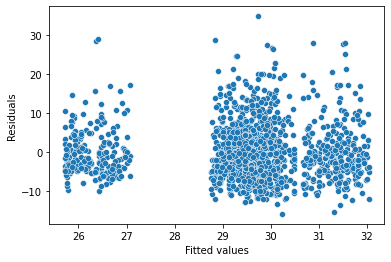

In [24]:
# Generate a scatterplot of the residuals against the fitted values for the model in question 2
pp = sns.scatterplot(x=result.fittedvalues, y=result.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

__Q4a.__ What mean/variance relationship do you see?

It appears that we have a modestly increasing mean/variance relationship. That is, the scatter around the mean BMI is greater when the mean BMI itself is greater.

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/sandbox/predict_functional.py:169: ValueWarning: 'RIAGENDR', 'RIDRETH1' in data frame but not in summaries or values.
  warnings.warn("%s in data frame but not in summaries or values."
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


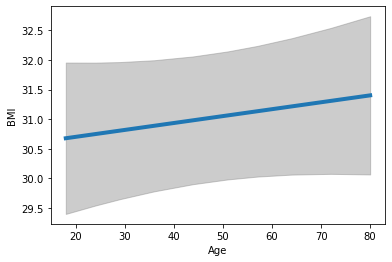

In [25]:
from statsmodels.sandbox.predict_functional import predict_functional

# Fix certain variables at reference values.
values = {"RIAGENDRx": "Male", "RIDRETH1x": "Mexican American"}

# The returned values are the predicted values (pr), the confidence bands (cb), and the function values (fv).
pr, cb, fv = predict_functional(result, "RIDAGEYR",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band?

0.

__Q5b.__ Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women.  At what ages do these intervals not overlap?

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/sandbox/predict_functional.py:169: ValueWarning: 'RIAGENDR', 'RIDRETH1' in data frame but not in summaries or values.
  warnings.warn("%s in data frame but not in summaries or values."
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/sandbox/predict_functional.py:169: ValueWarning: 'RIAGENDR', 'RIDRETH1' in data frame but not in summaries or values.
  warnings.warn("%s in data frame but not in summaries or values."
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument wil

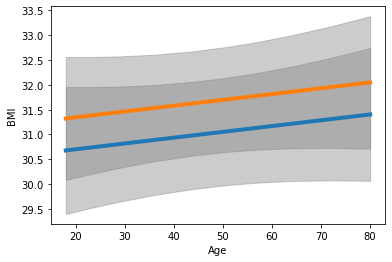

In [26]:
# Fix certain variables at reference values.
values = {"RIAGENDRx": "Male", "RIDRETH1x": "Mexican American"}
values_f = {"RIAGENDRx": "Female", "RIDRETH1x": "Mexican American"}

# The returned values are the predicted values (pr), the confidence bands (cb), and the function values (fv).
pr, cb, fv = predict_functional(result, "RIDAGEYR",
                values=values, ci_method="simultaneous")
pr_f, cb_f, fv_f = predict_functional(result, "RIDAGEYR",
                values=values_f, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax_f = sns.lineplot(fv_f, pr_f, lw=4)
ax_f.fill_between(fv_f, cb_f[:, 0], cb_f[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

The intervals overlap at all ages.

## Question 6:

Use an added variable plot to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

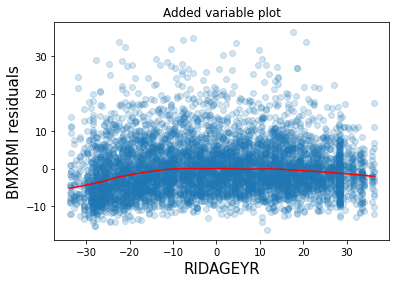

In [28]:
# This is not part of the main Statsmodels API, so needs to be imported separately
from statsmodels.graphics.regressionplots import add_lowess

# This is an equivalent way to fit a linear regression model, it needs to be
# done this way to be able to make the added variable plot
model = sm.GLM.from_formula("BMXBMI ~ RIDAGEYR + RIDRETH1x + RIAGENDRx", data=df)
result = model.fit()
result.summary()

# Construct variable plot to assess linearity of relationship between BMI and age
fig = result.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q6a.__ What is your interpretation of the added variable plot?

Unlike the relationship in the model, it is not forced to be linear, and there is in fact a hint that the shape is slightly curvilinear instead of a linear. This would imply that BMI increases with age for people in their 20s to 50s, then decreases with age for people in their 50s to 80s.

## Question 7: 

Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Calculate the marginal probability, odds, and log odds of this variable for women and for men.  Then calculate the odds ratio for females relative to males.

In [56]:
# Drop unused columns
vars = ["RIDAGEYR", "RIAGENDR", "DMDEDUC2", "ALQ110"]

# Drop rows with any missing values
dq = da[vars].dropna()

# Create a labeled version of the education variable
dq["DMDEDUC2x"] = dq.DMDEDUC2.replace({1: "lt9", 2: "9to11", 3: "HS", 4: "SomeCollege",
                                       5: "College", 7: np.nan, 9: np.nan})

# Create a labeled version of the gender variable
dq["RIAGENDRx"] = dq.RIAGENDR.replace({1: "Male", 2: "Female"})

# Create a binary variable reflecting the alcohol variable
dq["ALQ110b"] = dq.ALQ110.replace({2: 0, 7: np.nan, 9: np.nan})

# Calculate the marginal probability and odds of alcohol use for women and men separately
c = pd.crosstab(dq.RIAGENDRx, dq.ALQ110b).apply(lambda x: x/x.sum(), axis=1)
c["odds"] = c.loc[:, 1] / c.loc[:, 0] # To calculate odds
c["logodds"] = np.log(c.odds)
c

ALQ110b,0.0,1.0,odds,logodds
RIAGENDRx,,,,
Female,0.550492,0.449508,0.816558,-0.202657
Male,0.541667,0.458333,0.846154,-0.167054


In [57]:
# Calculate the odds ratio for females relative to males
c.odds.Female / c.odds.Male

0.9650236127508856

__Q7a.__ Based on the log odds alone, do more than 50% of women drink alcohol?

The fact that the log odds for females is negative reflects the fact that substantially less than 50% of females have had at least 12 drinks in their lifetime.

__Q7b.__ Does there appear to be an important difference between the alcohol use rate of women and men?

The odds ratio for whether a person has had at least 12 drinks in their lifetime, comparing females to males, is around 0.97. In other words, women have around 0.03 times lesser odds of drinking than men (in the population represented by these data).This is not an important difference. 

## Question 8: 

Use logistic regression to express the log odds that a person drinks (based on the binary drinking variable that you constructed above) in terms of gender.

In [58]:
# Construct logistic regressionn model to express the log odds that a person drinks in terms of gender 
model = sm.GLM.from_formula("ALQ110b ~ RIAGENDRx", family=sm.families.Binomial(), data=dq) # Family input to indicate logistic regression
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                ALQ110b   No. Observations:                 1575
Model:                            GLM   Df Residuals:                     1573
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1084.4
Date:                Fri, 03 Dec 2021   Deviance:                       2168.8
Time:                        14:06:18   Pearson chi2:                 1.58e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.2027      0.060     -3.372      0.001      -0.320      -0.085
RIAGENDRx[T.Male]     0.0356      0.112      0.319      0.750      -0.183       0.254
=====================================================================================
"""

__Q8a.__ Is there statistical evidence that the drinking rate differs between women and men?  If so, in what direction is there a difference?

In [59]:
0.750 / 2

0.375

No, there is no statistical evidence that the drinking rate differs between women and men (p=0.375)

__Q8b.__ Confirm that the log odds ratio between drinking and smoking calculated using the logistic regression model matches the log odds ratio calculated directly in question 6.

In [60]:
c.logodds.Male - c.logodds.Female

0.035602708770614305

The log odds ratios match.

## Question 9: 

Use logistic regression to relate drinking to age, gender, and education.

In [61]:
# Construct logistic regression model to relate drinking to age, gender and education
model = sm.GLM.from_formula("ALQ110b ~ RIDAGEYR + RIAGENDRx + DMDEDUC2x", family=sm.families.Binomial(), data=dq)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                ALQ110b   No. Observations:                 1574
Model:                            GLM   Df Residuals:                     1567
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1059.5
Date:                Fri, 03 Dec 2021   Deviance:                       2118.9
Time:                        14:10:32   Pearson chi2:                 1.57e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.9182      0.219     -4.200      0.000      -1.347      -0.490
RIAGENDRx[T.Male]            0.0172      0.114      0.151      0.880      -0.205       0.240
DMDEDUC2x[T.College]         0.4886      0.182      2.681      0.007       0.131       0.846
DMDEDUC2x[T.HS]              0.4013      0.184      2.179      0.029       0.040       0.762
DMDEDUC2x[T.SomeCollege]     0.5421      0.175      3.098      0.002       0.199       0.885
DMDEDUC2x[T.lt9]            -0.4087      0.194     -2.105      0.035      -0.789      -0.028
RIDAGEYR                     0.0086      0.003      2.951      0.003       0.003       0.014
============================================================================================
"""

__Q9a.__ Which of these predictor variables shows a statistically significant association with drinking?

Age and education.

__Q9b.__ What is the odds of a college educated, 50 year old woman drinking?

In [63]:
np.exp(0.4886 + 0.0086*50 - 0.9182)

1.0004000800106676

__Q9c.__ What is the odds ratio between the drinking status for college graduates and high school graduates (with no college), holding gender and age fixed?

In [64]:
np.exp(0.4886 - 0.4013)

1.0912239978174532

__Q9d.__ Did the regression parameter for gender change to a meaningful degree when age and education were added to the model?

In [65]:
0.0356 / 0.0086

4.1395348837209305

Adding age and education to the model leads to a large shift in the gender parameter (it changed from 0.0356 to 0.0086). In general, regression coefficients can change a lot when adding or removing other variables from a model. There is also now statistical evidence that the drinking rate differs between gender at this coefficient. 

## Question 10:

Construct a CERES plot for the relationship between drinking and age (using the model that controls for gender and educational attainment).

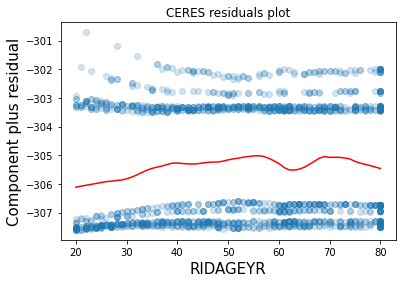

In [66]:
fig = result.plot_ceres_residuals("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q10a.__ Does the plot indicate any major non-linearity in the relationship between age and the log odds for drinking?

Yes, the plot indicates a major non-linearity in the relationship between age and the log odds for drinking where there is an unexpected decrease for people between the ages of 60 and 70. 